Implementing Neural Network for tabular data

3. Predicting Wine Quality using MLP

3.2 Data Preparation

Load and Prepare Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
wine = load_wine()
# Convert to pandas DataFrame
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')
print("Dataset shape:", X.shape)
print("\nFirst 5 rows:")
print(X.head())
# Q2. Different wine classes and distribution
print("\nClass distribution:")
print(y.value_counts())
# Q3. Missing values?
print("\nMissing values per column:")
print(X.isnull().sum())
# Q4. Names of wine classes
print("\nWine class names:")
print(wine.target_names)

Dataset shape: (178, 13)

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_dilu

1. How many samples and features does the dataset contain?
- It contains 178 samples and 13 features.
2. What are the different wine classes (targets) and their distribution?
- It has 3 wine classes, represented as 0, 1, 2.
Class distribution:
Class 0 : 59 samples
Class 1 : 71 samples
Class 2: 48 samples
3. Are there any missing values in the dataset?
- No missing values in the dataset
4. What are the names of the three wine classes?
- The three wine classes are:
Class 0: class_0
Class 1: class_1
Class 2: class_2

Data Splitting and Scaling

In [3]:
#Separatefeaturesandtarget
X=wine.data
y= wine.target
#TODO:Splitthedataintotraining(80%)andtesting(20%)sets
#Userandom_state=42forreproducibility
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42)
#Initialize a StandardScalerandfititontrainingdata
scaler =StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
print("Trainingsetshape:",X_train_scaled.shape)
print("Testingset shape:",X_test_scaled.shape)
print("Scalermean:",scaler.mean_)
print("Scalerscale:",scaler.scale_)

Trainingsetshape: (142, 13)
Testingset shape: (36, 13)
Scalermean: [1.29790845e+01 2.37352113e+00 2.36084507e+00 1.94732394e+01
 1.00443662e+02 2.28908451e+00 2.00211268e+00 3.68028169e-01
 1.60802817e+00 5.05760563e+00 9.56380282e-01 2.59281690e+00
 7.34894366e+02]
Scalerscale: [8.17222973e-01 1.13989881e+00 2.78232583e-01 3.44260619e+00
 1.45991147e+01 6.35465788e-01 1.00062785e+00 1.27816106e-01
 5.81597169e-01 2.32269541e+00 2.33275142e-01 7.19593358e-01
 3.01257195e+02]


1. Why do we split the data before scaling?
- to prevent data leakage from test set to training process we split the data before scaling.
2. Why should we fit the scaler only on training data?
- To simulate real world unseen data and avoid bias.
3. What is the purpose of using random state?
- To ensure reproducibility of results.
4. What do the scaler's mean and scale attributes represent?
- Mean : average of each feature, scaler: Standard deviation

Part 2 : Model Definition and Training

Create and Configure MLP model

In [4]:
from sklearn.neural_network import MLPClassifier

mlp= MLPClassifier(hidden_layer_sizes=(50, 25), activation="relu", solver = "adam", max_iter = 500, random_state = 42)
print("Modelarchitecture:",mlp.hidden_layer_sizes)
print("Activationfunction:",mlp.activation)
print("Solver:",mlp.solver)
print("Maximumiterations:",mlp.max_iter)

Modelarchitecture: (50, 25)
Activationfunction: relu
Solver: adam
Maximumiterations: 500


Model Training

In [5]:
mlp.fit(X_train_scaled, y_train)

print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final training loss: {mlp.loss_:.4f}")
print(f"Training set accuracy: {mlp.score(X_train_scaled, y_train):.4f}")

#check if model converged
if mlp.n_iter_ == mlp.max_iter:
    print("Warning: Model may not have converged.")
else:
    print("Model converged successfully.")


Training completed in 210 iterations
Final training loss: 0.0071
Training set accuracy: 1.0000
Model converged successfully.


1.What does the loss value represent?
- It represents the error between prdicted and actual value

2.How many iterations did the training take to converge?
- 210 iterations

3.What might it mean if the loss is very high?
- Model is underfitting or learn poorly

4.What is the training accuracy of your model?
- 1.0

Model Evaluation

Basic Evaluation

In [6]:
y_pred = mlp.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("Number of test samples:", len(y_test))
print("Correct predictions:", sum(y_pred == y_test))


Test Accuracy: 1.0000 (100.00%)
Number of test samples: 36
Correct predictions: 36


Detailed Performance Analysis

ClassificationReport:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



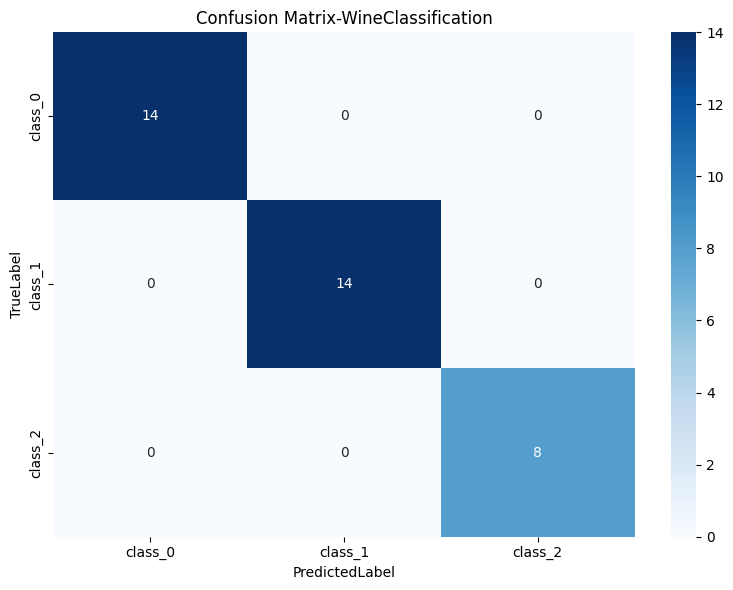


Weighted Precision:1.0000
WeightedRecall:1.0000
WeightedF1-Score:1.0000


In [7]:
print("ClassificationReport:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
xticklabels=wine.target_names,
yticklabels=wine.target_names)
plt.title('Confusion Matrix-WineClassification')
plt.ylabel('TrueLabel')
plt.xlabel('PredictedLabel')
plt.tight_layout()
plt.show()
#Calculate additional metrics
precision=precision_score(y_test,y_pred,average='weighted')
recall =recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
print(f"\nWeighted Precision:{precision:.4f}")
print(f"WeightedRecall:{recall:.4f}")
print(f"WeightedF1-Score:{f1:.4f}")


1. Which class has the best performance ? Which has the worst?
- All classes have same precision, recall and F1-score so they all perform equally.
2. What is the precision, recall, and F1-score for each class?
- for all three classes:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

3. Based on the confusion matrix, what types of errors is the model making?
- There are no errors since all predictions lay on the diagonal

4. Is there any class imbalance affecting the results?
- There is a minor class imbalance class_0 14 samples, class_1: 14 samples and class_2: 8 samples